In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string

In [2]:
df = pd.read_csv("twitter_training.csv")
df = df.head(30000)

In [3]:
df.head()

,no,topic,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.shape

(30000, 4)

In [5]:
df.drop(columns = ['no','topic'],inplace=True)

In [6]:
df.isnull().sum()

label      0
text     262
dtype: int64

In [7]:
df.dropna(inplace=True,axis=0)

In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
df.shape

(29738, 2)

In [10]:
df.duplicated().sum()

1639

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.head()

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df['label'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [14]:
df['label'] = df['label'].map({'Positive':1,'Negative':2,'Neutral':3,'Irrelevant':4})

In [15]:
df['label'].unique()

array([1, 3, 2, 4], dtype=int64)

In [16]:
df['label'].value_counts()

label
1    8869
3    7230
2    7053
4    4947
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac5415bfb0>,
 [Text(0.6020926583369911, 0.9205891758959017, 'negative'),
  Text(-1.033287472634831, 0.3772492530090998, 'positive'),
  Text(-0.35014843238586896, -1.0427828514593624, 'neutral'),
  Text(0.9359921246169659, -0.5778570261362392, 'irre')],
 [Text(0.3284141772747224, 0.5021395504886736, '31.56'),
  Text(-0.5636113487099077, 0.20577231982314534, '25.73'),
  Text(-0.19099005402865576, -0.5687906462505613, '25.10'),
  Text(0.5105411588819814, -0.31519474152885774, '17.61')])

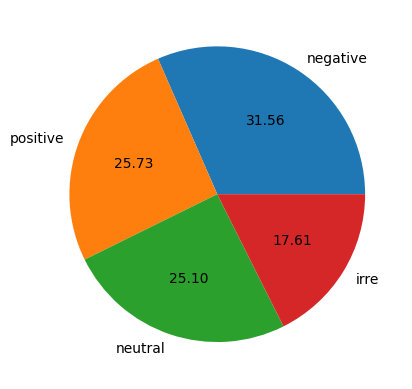

In [17]:
plt.pie(df['label'].value_counts(),labels=['negative','positive','neutral','irre'],autopct="%0.2f")

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [20]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [22]:
def preprocessing(text):
    preprocessed_text = ""
    sentences = nltk.sent_tokenize(text)
    for i in range(len(sentences)):
        sentences[i] = sentences[i].lower()
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in set(stopwords.words('english'))]
        # Remove punctuation and special characters
        words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
        words = [word for word in words if word.isalnum()]  # Remove non-alphanumeric characters
        words = [lemmatizer.lemmatize(word, pos='v') for word in words]
        words = [stemming.stem(word) for word in words]
        preprocessed_text += " ".join(words) + " " 
    return preprocessed_text.strip()


In [23]:
df['text'] = df['text'].apply(preprocessing)

In [24]:
df.head()

,label,text
0,1,im get borderland murder
1,1,come border kill
2,1,im get borderland kill
3,1,im come borderland murder
4,1,im get borderland 2 murder


In [49]:
X = df['text']
y = df['label']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [51]:
X = cv.fit_transform(X).toarray()

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
X_train.shape

(22479, 15609)

In [54]:
X_test.shape

(5620, 15609)

In [55]:
y_train.shape

(22479,)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8482206405693951
[[1648   82   66   46]
 [ 109 1201   51   29]
 [ 119   91 1194   51]
 [ 118   56   35  724]]


In [58]:
import pickle
pickle.dump(cv,open('vector.pkl','wb'))
pickle.dump(preprocessing,open('preprocessing_func.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))

In [59]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [60]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [61]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.744306049822064

In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
accuracy_score(y_test,y_pred2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7119217081850534